#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u>Regresión Lineal</u>**
---
---

In [68]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# Importación de la librería "os" para manipular rutas de archivos.
# Ruta del directorio que se desea establecer como directorio de trabajo.
# Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
import os
DIR = "/content/drive/MyDrive/Ciencia_Analitica_Datos"
os.chdir(DIR)

In [70]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Carga de archivo CSV.
insurance_df = pd.read_csv('insurance.csv')
# DataFrame
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [72]:
# Información del dataset.
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Parte 1**. EDA

Se efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [73]:
# Estadísticas descriptivas variables cunatitativas.
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [74]:
# Estadísticas descriptivas variables categóricas.
insurance_df.describe(include = 'object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [75]:
# Valores faltantes.
missing_values = insurance_df.isnull().sum()
print("Valores Faltantes por Columna:")
missing_values

Valores Faltantes por Columna:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

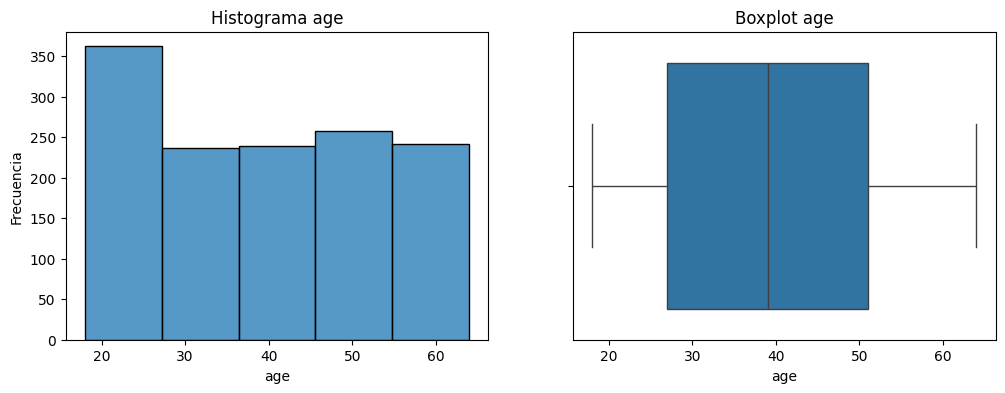

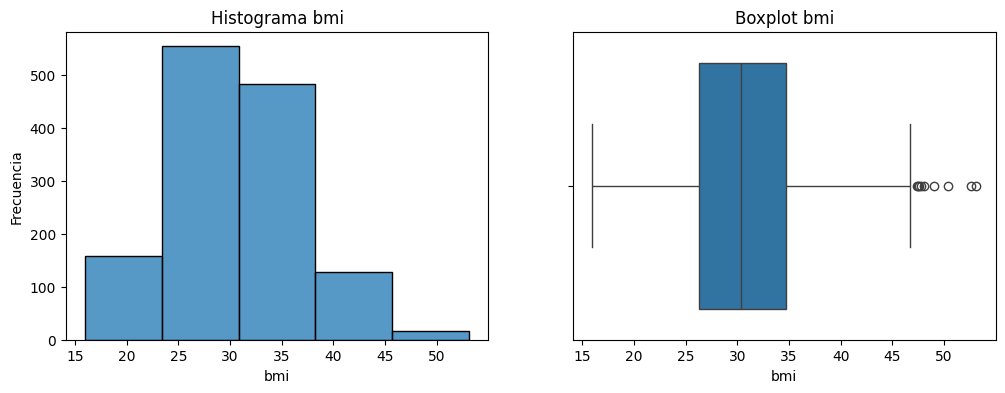

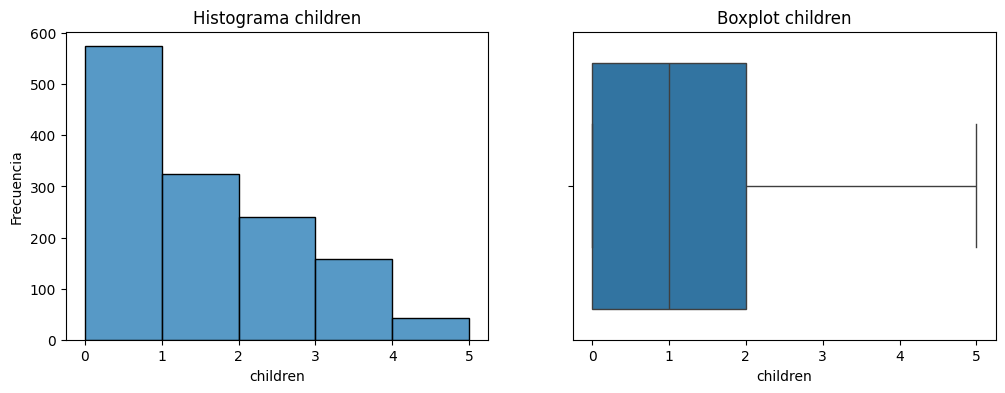

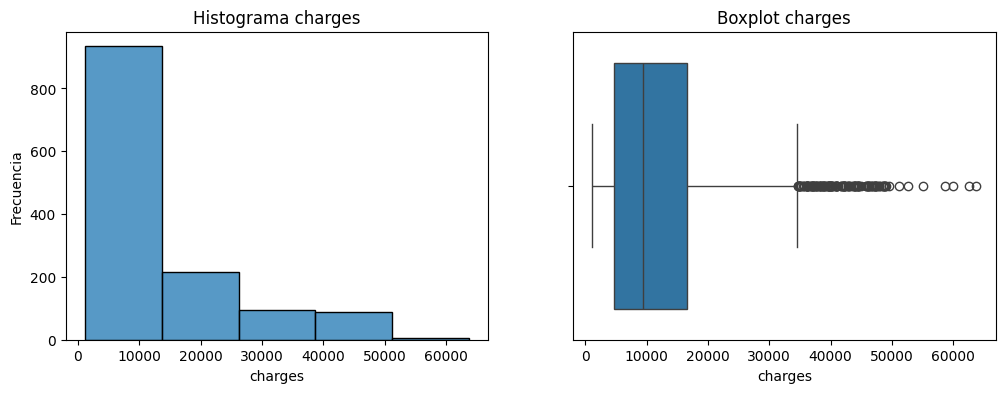

In [76]:
# Columnas cuantitativas.
numeric_columns = insurance_df.select_dtypes(include = ['int64', 'float64'])

# Gráficas
for column in numeric_columns.columns:
    fig, axes = plt.subplots(1, 2, figsize = (12, 4))

    # Histograma
    sns.histplot(insurance_df[column], bins = 5, ax = axes[0])  # Ajustar el número de bins según tu preferencia
    axes[0].set_title(f'Histograma {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(data = insurance_df, x = column, ax = axes[1])
    axes[1].set_title(f'Boxplot {column}')
    axes[1].set_xlabel(column)

    # Mostrar gráficos.
    plt.show()

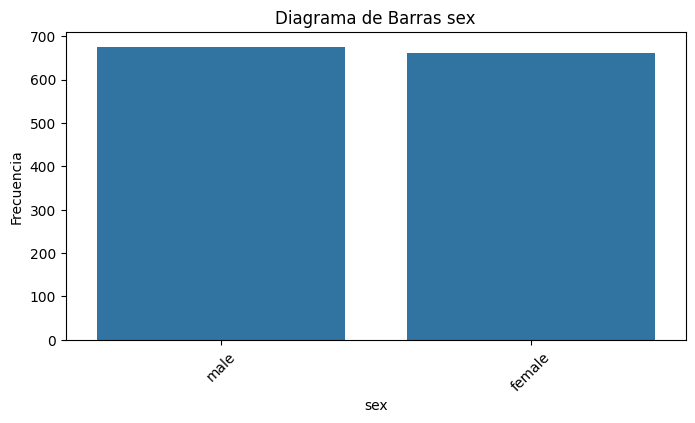

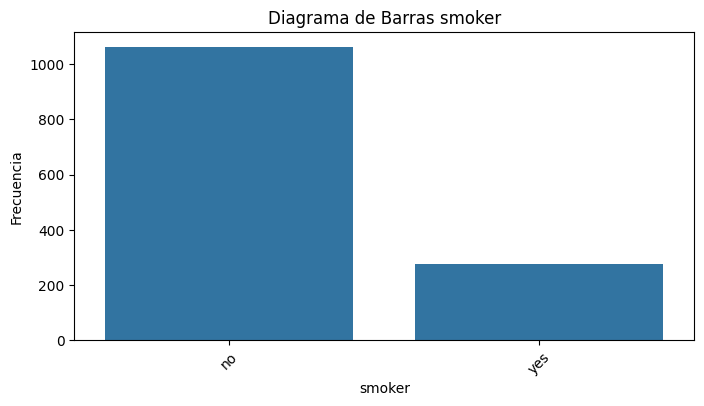

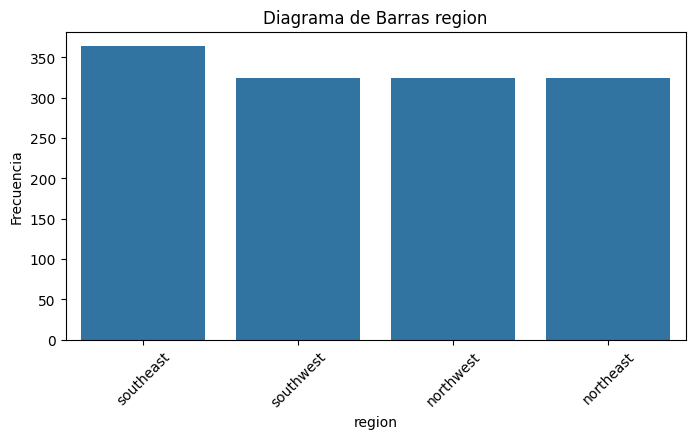

In [77]:
# Columnas categóricas.
categorical_columns = insurance_df.select_dtypes(include = ['object'])

# Gráfica de barras.
for column in categorical_columns.columns:
    plt.figure(figsize = (8, 4))
    counts = insurance_df[column].value_counts()
    sns.barplot(x = counts.index, y = counts.values)
    plt.title(f'Diagrama de Barras {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation = 45)
    plt.show()

Para responder los siguientes cuestionamientos, se generan los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Se compara la distribución de la variable `charges` por medio de un boxplot.

El primer cuartil y el segundo cuartil se encuentran ubicados en el mismo costo de los cargos tanto para hombres como para mujeres, sin embargo, el tercer y cuarto cuartil son más elevados para los hombres. Según el gráfico de boxplot, se demuestra que hay una diferencia en las primas según el sexo en el tercer y cuarto cuartil.

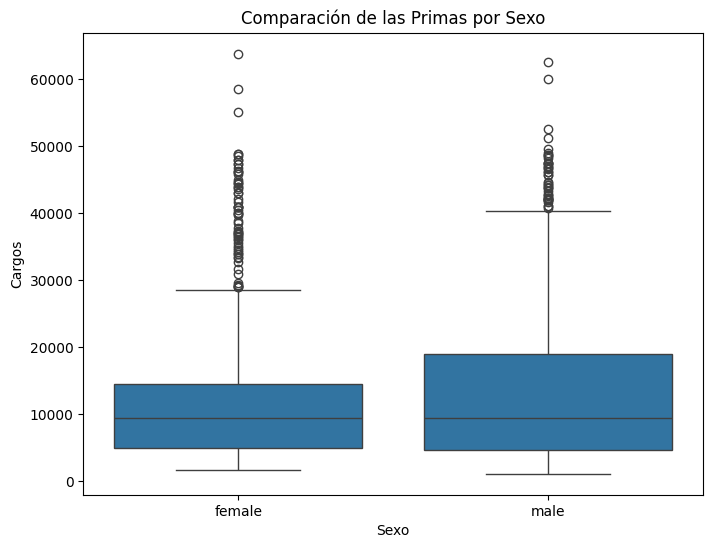

In [78]:
# Boxplot
plt.figure(figsize = (8, 6))
sns.boxplot(data = insurance_df, x = 'sex', y = 'charges')
plt.title('Comparación de las Primas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cargos')
plt.show()

2b) Se crea un diagrama de dispersión de `charges` versus el `bmi` que incorpora la distinción por las categorías `smoker` y `children` (tip: se utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

Al observar el gráfico se puede sacar la conclusión que las personas que fuman pagan más por su seguro y que la cantidad de hijos realmente no afecta lo que las personas pagan por su seguro.

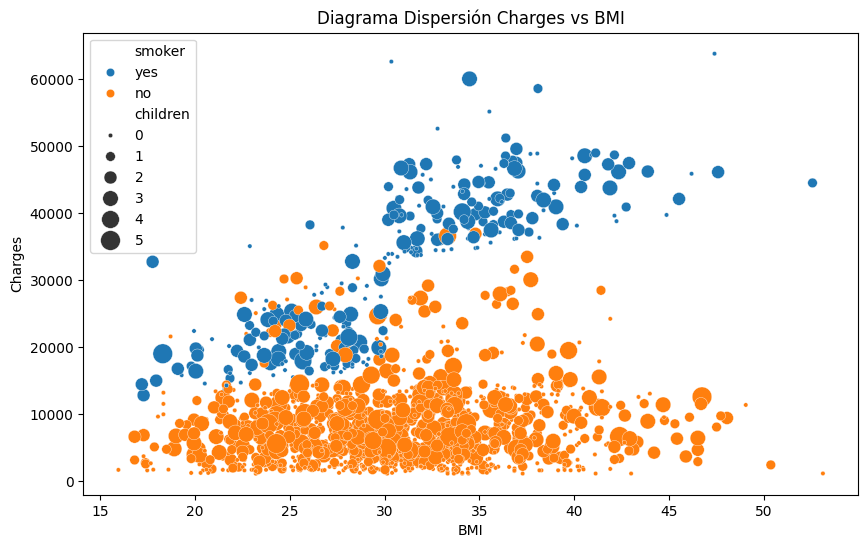

In [79]:
# Diagrama Disperción
plt.figure(figsize = (10, 6))
sns.scatterplot(data = insurance_df, x = 'bmi', y = 'charges', hue = 'smoker', size = 'children', sizes = (10, 200))
plt.title('Diagrama Dispersión Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
#plt.legend(title = 'Smoker', loc = 'upper right', labels = ['No', 'Sí'])
plt.show()

2c) Se elabora un mapa de calor que muestre la correlación de las variables numéricas.

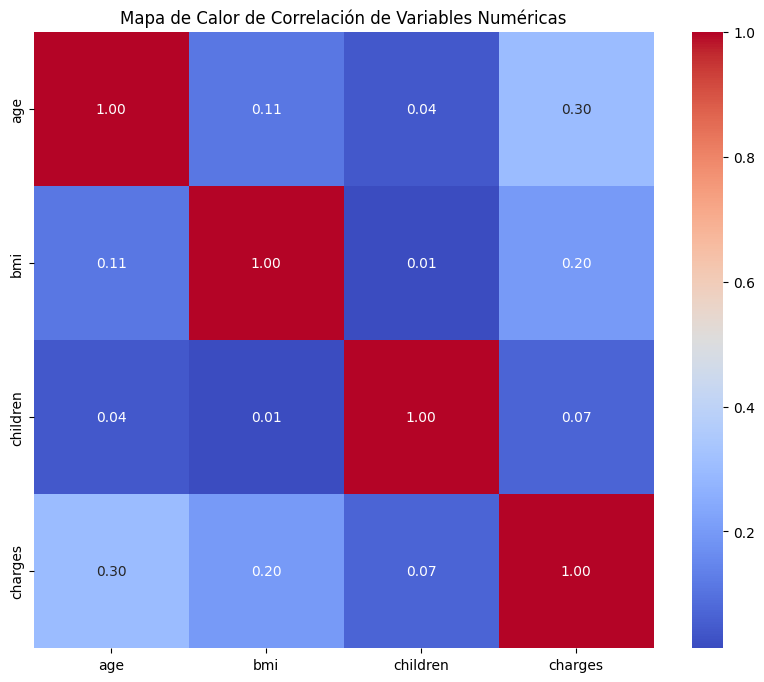

In [80]:
# Columnas cuantitativas.
numeric_columns = insurance_df.select_dtypes(include = ['int64', 'float64'])

# Matriz de correlación.
correlation_matrix = numeric_columns.corr()

# Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

Se obtiene un dataframe con las observaciones que tengan valores atípicos en `charges`.

In [81]:
# Primer y Tercer Cuartil (percentiles 25 y 75).
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)

# Rango Intercuartílico (IQR)
IQR = Q3 - Q1

# Límites Valores Atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrado de valores atípicos en la variable 'charges'.
outliers_df = insurance_df[(insurance_df['charges'] < lower_limit) | (insurance_df['charges'] > upper_limit)]

# Resultado
print("Dataframe con las observaciones que tienen valores atípicos en la variable 'charges':")
outliers_df

Dataframe con las observaciones que tienen valores atípicos en la variable 'charges':


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [82]:
# Promedio 'age' y 'bmi'.
average_age = insurance_df['age'].mean()
average_bmi = insurance_df['bmi'].mean()

print(f'Promedio age: {average_age}')
print(f'Promedio bmi: {average_bmi}')

Promedio age: 39.20702541106129
Promedio bmi: 30.66339686098655


3b) ¿Qué porcentaje de estas observaciones corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

Porcentaje Mujeres: 49.48%
Porcentaje Hombres: 50.52%


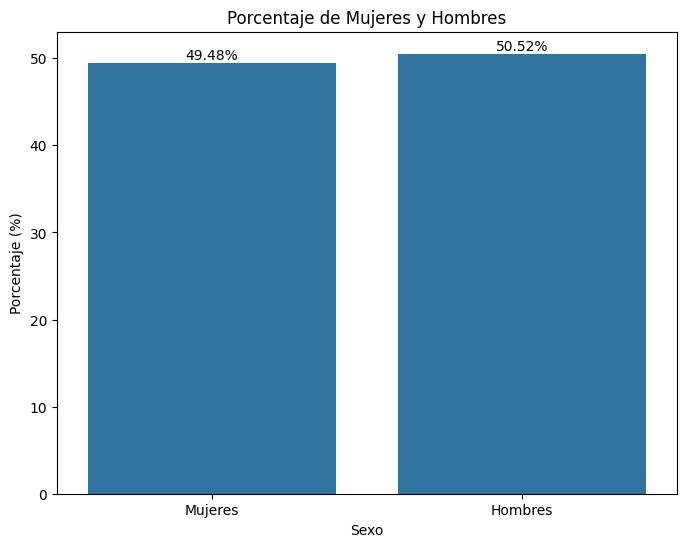

In [83]:
# Calculo de porcentajes.
sex_counts = insurance_df['sex'].value_counts()
total_count = len(insurance_df)
percentage_male = (sex_counts['male'] / total_count) * 100
percentage_female = (sex_counts['female'] / total_count) * 100

# Mostrar resultados.
print(f"Porcentaje Mujeres: {percentage_female:.2f}%")
print(f"Porcentaje Hombres: {percentage_male:.2f}%")


# Gráfica de barras.
plt.figure(figsize = (8, 6))
sns.barplot(x = ['Mujeres', 'Hombres'], y = [percentage_female, percentage_male])
plt.xlabel('Sexo')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Mujeres y Hombres')

# Mostrar los valores en las barras
for i, percentage in enumerate([percentage_female, percentage_male]):
    plt.text(i, percentage, f'{percentage:.2f}%', ha = 'center', va = 'bottom')

# Mostrar gráfica.
plt.show()

Porcentaje No Fumadores: 79.52%
Porcentaje Fumadores: 20.48%


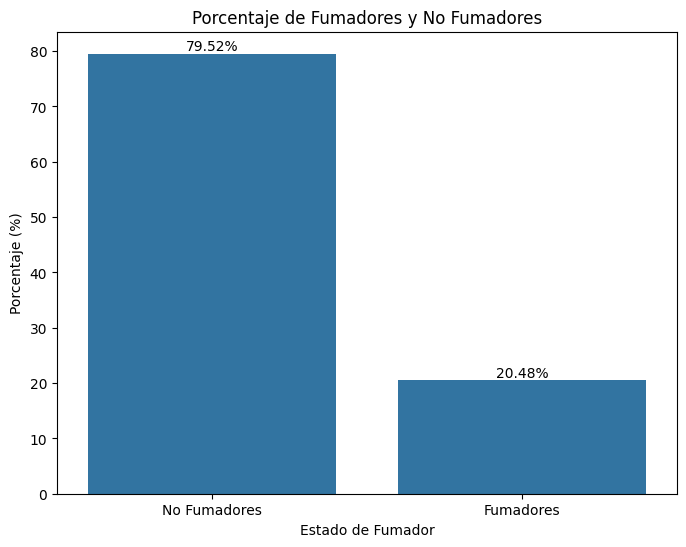

In [84]:
# Calculo de porcentajes.
smoker_counts = insurance_df['smoker'].value_counts()
total_count = len(insurance_df)
percentage_smoker = (smoker_counts['yes'] / total_count) * 100
percentage_no_smoker = (smoker_counts['no'] / total_count) * 100

# Mostrar resultados.
print(f"Porcentaje No Fumadores: {percentage_no_smoker:.2f}%")
print(f"Porcentaje Fumadores: {percentage_smoker:.2f}%")


# Gráfica de barras.
plt.figure(figsize = (8, 6))
sns.barplot(x = ['No Fumadores', 'Fumadores'], y = [percentage_no_smoker, percentage_smoker])
plt.xlabel('Estado de Fumador')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Fumadores y No Fumadores')

# Mostrar los valores en las barras
for i, percentage in enumerate([percentage_no_smoker, percentage_smoker]):
    plt.text(i, percentage, f'{percentage:.2f}%', ha = 'center', va = 'bottom')

# Mostrar gráfica.
plt.show()

Porcentaje de Mujeres No Fumadoras: 40.88%
Porcentaje de Mujeres Fumadoras: 8.59%
Porcentaje de Hombres No Fumadores: 38.64%
Porcentaje de Hombres Fumadores: 11.88%


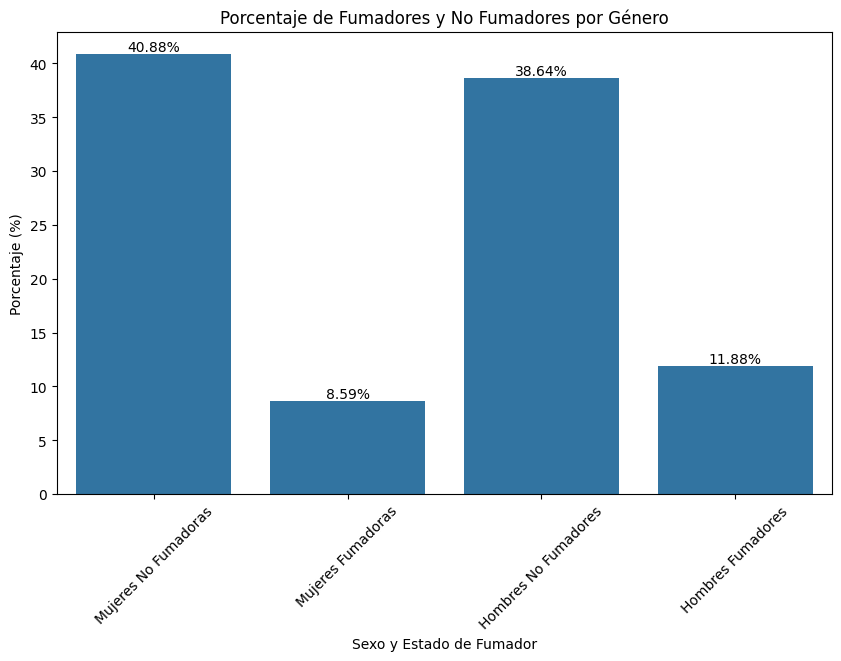

In [85]:
# Porcentajes de fumadores por género.
gender_smoker_counts = insurance_df.groupby(['sex', 'smoker']).size().unstack()
total_count = len(insurance_df)

# Porcentaje de mujeres no fumadoras y fumadoras.
percentage_female_non_smoker = (gender_smoker_counts.loc['female', 'no'] / total_count) * 100
percentage_female_smoker = (gender_smoker_counts.loc['female', 'yes'] / total_count) * 100

# Porcentaje de hombres no fumadores y fumadores.
percentage_male_non_smoker = (gender_smoker_counts.loc['male', 'no'] / total_count) * 100
percentage_male_smoker = (gender_smoker_counts.loc['male', 'yes'] / total_count) * 100

# Mostrar resultados.
print(f"Porcentaje de Mujeres No Fumadoras: {percentage_female_non_smoker:.2f}%")
print(f"Porcentaje de Mujeres Fumadoras: {percentage_female_smoker:.2f}%")
print(f"Porcentaje de Hombres No Fumadores: {percentage_male_non_smoker:.2f}%")
print(f"Porcentaje de Hombres Fumadores: {percentage_male_smoker:.2f}%")

# Gráfica de barras.
plt.figure(figsize = (10, 6))
sns.barplot(x = ['Mujeres No Fumadoras', 'Mujeres Fumadoras', 'Hombres No Fumadores', 'Hombres Fumadores'],
            y = [percentage_female_non_smoker, percentage_female_smoker, percentage_male_non_smoker, percentage_male_smoker])
plt.xlabel('Sexo y Estado de Fumador')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Fumadores y No Fumadores por Género')

# Mostrar los valores en las barras
for i, percentage in enumerate([percentage_female_non_smoker, percentage_female_smoker, percentage_male_non_smoker, percentage_male_smoker]):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

# Mostrar gráfica.
plt.xticks(rotation = 45)
plt.show()


# **Parte 2**. Preprocesamiento

4. Se separa las variables del dataframe: en `X` se colocan los predictores y en `y` la variable de respuesta o salida (`charges`).

In [86]:
# Predictores
X = insurance_df.drop(columns = ['charges'])

# Variable de salida.
y = insurance_df['charges']

In [87]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [88]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

5. Se divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Se analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
(Si)
*   Como ya se tienen separados en `X` e `y` los predictores y la salida, se consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [89]:
# División datos entrenamiento y prueba.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [90]:
X_train

,age,sex,bmi,children,smoker,region
216,53,female,26.600,0,no,northwest
731,53,male,21.400,1,no,southwest
866,18,male,37.290,0,no,southeast
202,60,female,24.035,0,no,northwest
820,45,male,33.700,1,no,southwest
...,...,...,...,...,...,...
715,60,male,28.900,0,no,southwest
905,26,female,29.355,2,no,northeast
1096,51,female,34.960,2,yes,northeast
235,40,female,22.220,2,yes,southeast


In [91]:
X_test

,age,sex,bmi,children,smoker,region
559,19,male,35.530,0,no,northwest
1087,57,male,31.540,0,no,northwest
1020,51,male,37.000,0,no,southwest
460,49,female,36.630,3,no,southeast
802,21,male,22.300,1,no,southwest
...,...,...,...,...,...,...
682,39,male,35.300,2,yes,southwest
629,44,female,38.950,0,yes,northwest
893,47,male,38.940,2,yes,southeast
807,19,female,36.575,0,no,northwest


In [92]:
y_train

216     10355.64100
731     10065.41300
866      1141.44510
202     13012.20865
820      7445.91800
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 1070, dtype: float64

In [93]:
y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64

6. Se prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [94]:
# Bibliotecas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
import numpy as np

# Transformador combinando escalamiento y codificación.
preprocessing = ColumnTransformer([
        ('num', MinMaxScaler(), make_column_selector(dtype_include = np.number)),
        ('cat', OneHotEncoder(), make_column_selector(dtype_include = object))
    ])

# **Parte 3**. Entrenando y Evaluando el Modelo de RL

7. Se ejecuta el pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Se evalúa el modelo en el conjunto de prueba y se obtiene la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Esta última, toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [95]:
# Bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline

# Pipeline con preprocesamiento y emodelo de regresión lineal.
lr_model = make_pipeline(preprocessing, LinearRegression())

# Entrenar el modelo
lr_model.fit(X_train, y_train)

# Predicciones
y_pred = lr_model.predict(X_test)

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse:.2f}")

# R cuadrado
r2 = r2_score(y_test, y_pred)
print(f"R Cuadrado (R2): {r2:.2f}")

RMSE: 5962.14
R Cuadrado (R2): 0.76


**Se valora el rendimiento del modelo con los siguientes cambios:**

8. Se reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Se hace el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Se guarda el modelo como `lr_model2`.

In [96]:
# Bibliotecas
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# Reemplazar outliers en 'y_train'.
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
y_train[y_train > upper_limit] = upper_limit

# Reemplazar outliers en 'y_test'.
Q1_test = np.percentile(y_test, 25)
Q3_test = np.percentile(y_test, 75)
IQR_test = Q3_test - Q1_test
upper_limit_test = Q3_test + 1.5 * IQR_test
y_test[y_test > upper_limit_test] = upper_limit_test


# Pipeline con preprocesamiento y emodelo de regresión lineal.
lr_model2 = make_pipeline(preprocessing, LinearRegression())

# Entrenar el modelo
lr_model2.fit(X_train, y_train)

# Predicciones
y_pred2 = lr_model2.predict(X_test)

# RMSE
rmse_2 = mean_squared_error(y_test, y_pred2, squared = False)
print(f"RMSE con outliers reemplazados: {rmse_2:.2f}")

# R cuadrado
r2_2 = r2_score(y_test, y_pred2)
print(f"R cuadrado (R2) con outliers reemplazados: {r2_2:.2f}")

RMSE con outliers reemplazados: 5006.33
R cuadrado (R2) con outliers reemplazados: 0.76


9. Se prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Se aplica en un nuevo pipeline utilizando nuevamente regresión lineal. Se guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [97]:
# Bibliotecas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector
import numpy as np

# Transformador combinando escalamiento y codificación.
preprocessing2 = ColumnTransformer([
    ('num', StandardScaler(), make_column_selector(dtype_include = np.number)),
    ('cat', OrdinalEncoder(), make_column_selector(dtype_include = object))
])

# Pipeline con preprocesamiento y emodelo de regresión lineal.
lr_model3 = make_pipeline(preprocessing2, LinearRegression())

# Entrenar el modelo
lr_model3.fit(X_train, y_train)

# Predicciones
y_pred3 = lr_model3.predict(X_test)

# RMSE
rmse_3 = mean_squared_error(y_test, y_pred3, squared = False)
print(f"RMSE: {rmse_3:.2f}")

# R cuadrado
r2_3 = r2_score(y_test, y_pred3)
print(f"R Cuadrado (R2): {r2_3:.2f}")

RMSE: 4995.62
R Cuadrado (R2): 0.76


10. Se utiliza regresión polinomial para verificar si se produce un mejor ajuste. Se intenta con varios grados. Se deja en el código sólo el de mejor rendimiento. Se guarda el modelo como `lr_model4`.

In [98]:
# Biblioteca
from sklearn.preprocessing import PolynomialFeatures

# Grado del polinomio
degree = 2

# Pipeline con preprocesamiento y emodelo de regresión lineal.
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo
lr_model4.fit(X_train, y_train)

# Predicciones
y_pred4 = lr_model4.predict(X_test)

# RMSE
rmse_4 = mean_squared_error(y_test, y_pred4, squared = False)
print(f"RMSE: {rmse_3:.2f}")

# R cuadrado
r2_4 = r2_score(y_test, y_pred4)
print(f"R Cuadrado (R2): {r2_4:.2f}")

RMSE: 4995.62
R Cuadrado (R2): 0.82
